# Unit 5 - Financial Planning

In [ ]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
from datetime import datetime 
from alpaca_trade_api.rest import REST, TimeFrame

%matplotlib inline

In [ ]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [ ]:
# Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3

In [ ]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [ ]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
print(json.dumps(btc_response_data, indent=2))


# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
print(json.dumps(eth_response_data, indent=2))

# Compute current value of my crpto
my_btc_value = btc_response_data["data"]["1"]["quotes"]["CAD"]["price"] * my_btc
my_eth_value = eth_response_data["data"]["1027"]["quotes"]["CAD"]["price"]  * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
  "data": {
    "1": {
      "id": 1,
      "name": "Bitcoin",
      "symbol": "BTC",
      "website_slug": "bitcoin",
      "rank": 1,
      "circulating_supply": 18995025,
      "total_supply": 18995025,
      "max_supply": 21000000,
      "quotes": {
        "USD": {
          "price": 44657.0,
          "volume_24h": 14044511837,
          "market_cap": 847798208426,
          "percentage_change_1h": -0.014528368316938,
          "percentage_change_24h": 0.51318869299523,
          "percentage_change_7d": 5.81719912184064,
          "percent_change_1h": -0.014528368316938,
          "percent_change_24h": 0.51318869299523,
          "percent_change_7d": 5.81719912184064
        },
        "CAD": {
          "price": 55714.0732,
          "volume_24h": 17521932967.8412,
          "market_cap": 1057713044832.28,
          "percent_change_1h": -0.014528368316938,
          "percent_change_24h": 0.51318869299523,
          "percent_change_7d": 5.81719912184064
        }
      },
     

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [ ]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [26]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {alpaca_api_key}")
print(f"Alpaca Secret Key type: {alpaca_secret_key}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: PKMQW5X1S1IH6XQFFEUS
Alpaca Secret Key type: FSMB1LncqYEhyy0d4mvO0J3ZKO9Jm1JhvzzUV3Jt


In [64]:
def subtract_days(num_of_days):
    earlier_date =  pd.to_datetime('now').floor('d') - pd.offsets.Day(num_of_days)
    earlier_date_iso = pd.Timestamp(earlier_date, tz="America/New_York").isoformat()
    return earlier_date_iso

def subtract_years(num_of_years):
    # if we want current time, use datetime.now()
    past_date = pd.to_datetime('now').floor('d') - pd.DateOffset(years=num_of_years)
    #earlier_date =  pd.to_datetime('now').floor('d') - pd.offsets.Year(num_of_years)
    earlier_date_iso = pd.Timestamp(past_date, tz="America/New_York").isoformat()
    return earlier_date_iso

today = subtract_days(0)
yesterday = subtract_days(1)
day_before_yesterday = subtract_days(2)
print(f"today is {today}, yesterday is {yesterday}")

date_year_old = subtract_years(1)
print(date_year_old)
    

today is 2022-03-27T00:00:00-04:00, yesterday is 2022-03-26T00:00:00-04:00
2021-03-27T00:00:00-04:00


In [65]:
# Format current date as ISO format
current_date = datetime.now()
print(f"current date is {current_date}")
today = pd.Timestamp(current_date, tz="America/New_York").isoformat()
print(f"current date in ISO format is {today}")
# Set the tickers
tickers = ["AGG", "SPY"]

start_date = pd.Timestamp("2022-03-27", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-03-27", tz="America/New_York").isoformat()


# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

#sometimes, not getting data for today or yesterday (depending on what time API was executed), so getting 
#the closing price at day before yesterday
df_portfolio = alpaca.get_bars(tickers, TimeFrame.Day,day_before_yesterday, adjustment='raw').df

# Preview DataFrame
df_portfolio
#df_portfolio.index = df_portfolio.index.date


current date is 2022-03-27 01:17:32.750925
current date in ISO format is 2022-03-27T01:17:32.750925-04:00


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-25 04:00:00+00:00,106.65,106.65,105.975,106.10,10295813,37569,106.190724,AGG
2022-03-25 04:00:00+00:00,451.09,452.98,448.430,452.69,77199328,661033,451.047221,SPY


In [17]:
# Pick AGG and SPY close prices
df_portfolio = df_portfolio[['close','symbol']]
df_portfolio
agg_close_price = df_portfolio.iloc[0]['close']
agg_close_price
spy_close_price = df_portfolio.iloc[1]['close']
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.1
Current SPY closing price: $452.69


In [18]:
# Compute the current value of shares
my_spy_value  = my_spy*spy_close_price
my_agg_value = my_agg*agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22634.50
The current value of your 200 AGG shares is $21220.00


### Savings Health Analysis

In [19]:
# Set monthly household income
monthly_income =12000

# Consolidate financial assets data
total_value_shares = my_spy_value + my_agg_value
total_value_crypto = my_btc_value + my_eth_value


amount_data ={"amount":[total_value_crypto,total_value_shares]}

financial_asset_categories = ["crypto","shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(amount_data, index=financial_asset_categories)

# Display savings DataFrame
display(df_savings)

,amount
crypto,87624.86911
shares,43854.50000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

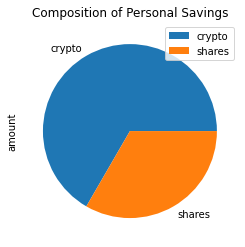

In [20]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

msg_enough_money= "Congratultions! You having enough money in this fund"
msg_reached_financial_goal="Congratultions!  you have reached your financial goal"
msg_away_from_goal_by =" You are away from reaching the goal by amount of :"

# Calculate total amount of savings
total_savings = total_value_shares + total_value_crypto

# Validate saving health - this is the amount that is more or less than the emergency fund
saving_health = total_savings - emergency_fund

if(total_savings>emergency_fund):
    print(msg_enough_money)
elif (total_savings == emergency_fund):
     print(msg_reached_financial_goal)
else:
    print(msg_away_from_goal_by + str(-(saving_health)))


Congratultions! You having enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-03-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")